In [0]:
import numpy as np
import pandas as pd

In [0]:
covid = pd.read_csv("https://raw.githubusercontent.com/sandeco/CanalSandeco/master/covid-19/covid_19_data.csv")

covid.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)

## **PRÉ-PROCESSAMENTO**

In [0]:
covid.columns

Index(['SNo', 'Date', 'Province/State', 'Country', 'Last Update', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [0]:
covid[['Date','Country','Confirmed','Deaths', 'Recovered']]

,Date,Country,Confirmed,Deaths,Recovered
0,01/22/2020,Mainland China,1.0,0.0,0.0
1,01/22/2020,Mainland China,14.0,0.0,0.0
2,01/22/2020,Mainland China,6.0,0.0,0.0
3,01/22/2020,Mainland China,1.0,0.0,0.0
4,01/22/2020,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...
9112,03/26/2020,US,53.0,0.0,0.0
9113,03/26/2020,Mainland China,76.0,3.0,73.0
9114,03/26/2020,Canada,3.0,0.0,0.0
9115,03/26/2020,Mainland China,178.0,2.0,172.0


In [0]:
covid.Country.unique()

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt',
       'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan',
       'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia',
       'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia',
       'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands',
       'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania',
       'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia

## **SELECIONANDO BRASIL PAÍSES**

A função abaixo seleciona paises 

In [0]:
def desde1caso(data, paises, dias, situacao):

  covid = pd.DataFrame()

  for pais in paises:
    try:
      df = data.loc[data.Country==pais ,  :]
      df = df.groupby('Date').sum()[situacao].reset_index()
      df = df.drop("Date", axis=1)
      covid = pd.concat([covid, df], ignore_index=True, axis=1)
    except:
      print("Is not " + situacao + " in " + pais )
  
  covid.columns = paises

  return covid.head(dias)


## **N dias após o primeiro caso**

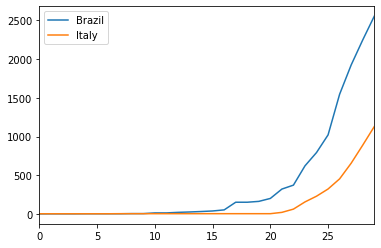

In [0]:
# data = todo o data frame do covid-19
# array = de paises para comparação 
# quantidade de dias a partir do 1º dia
# situação = Confirmed/Deaths/Recovered


paises_dias = desde1caso(covid, ['Brazil','Italy' ], 30, 'Confirmed')
paises_dias.plot()

BRAZIL VS JAPAN

60 primeiros dias após o 1° caso confirmado

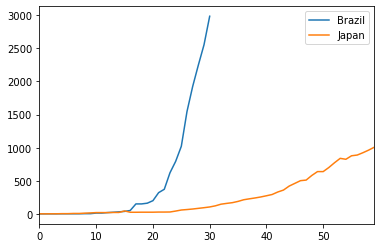

In [0]:
paises_dias = desde1caso(covid, ["Brazil",'Japan' ], 60, 'Confirmed')
paises_dias.plot()

Itália vs Spain

60 dias após o 1º caso

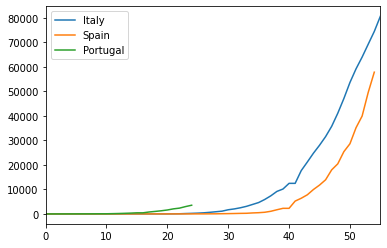

In [0]:

paises_dias = desde1caso(covid, ['Italy' , 'Spain', 'Portugal'], 60, 'Confirmed')
paises_dias.plot()

## COMPARANDO BRASIL VS ESTADOS UNIDOS

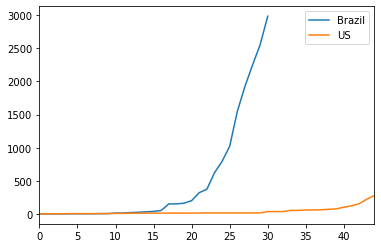

In [0]:

paises_dias = desde1caso(covid, ["Brazil",'US' ], 45, 'Confirmed')
paises_dias.plot()

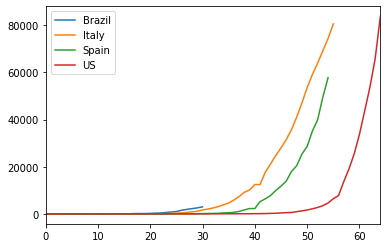

In [0]:
paises_dias = desde1caso(covid, ['Brazil','Italy', 'Spain','US' ],120, 'Confirmed')
paises_dias.plot()

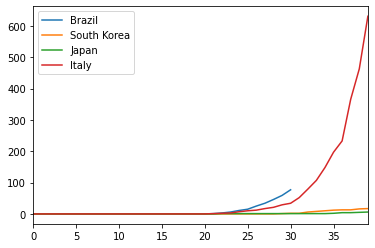

In [0]:
paises_dias = desde1caso(covid, ['Brazil','South Korea', 'Japan', 'Italy' ],40, 'Deaths')
paises_dias.plot()

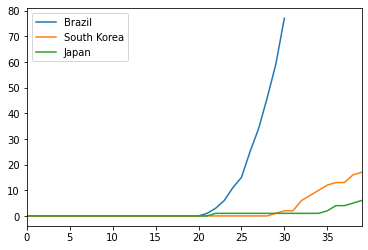

In [0]:
paises_dias = desde1caso(covid, ['Brazil','South Korea', 'Japan' ],40, 'Deaths')
paises_dias.plot()

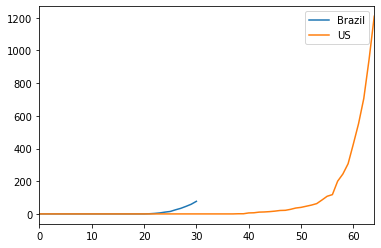

In [0]:
paises_dias = desde1caso(covid, ['Brazil', 'US' ],80, 'Deaths')
paises_dias.plot()